In [1]:
%load_ext autoreload
%autoreload 2

In [101]:
from trott import *
from qiskit import IBMQ
from qiskit.providers.aer import QasmSimulator
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

In [3]:
trott_gate = gen_3cnot_trott_gate() # using the basic trott method (this can be changed)x
trott_steps_range = np.arange(4,18,1)
unitary_folding_steps_range = np.arange(0,10,1)
qcs = gen_st_qcs_range(trott_gate, trott_steps_range, unitary_folding_steps_range=unitary_folding_steps_range)
# qcs[10][-2].draw() # e.g. 10 trott steps, example tomo circuit

In [4]:
qcs[(4,3)][-1].draw()

»
q7_0: ─────────────────────────────────────────────────────────────»
           ┌────────────┐┌────────────┐┌────────────┐┌────────────┐»
q7_1: ─────┤0           ├┤0           ├┤0           ├┤0           ├»
           │            ││            ││            ││            │»
q7_2: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_3: ┤ X ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├┤1 Trot(π/4) ├»
      └───┘│            ││            ││            ││            │»
q7_4: ─────┤            ├┤            ├┤            ├┤            ├»
      ┌───┐│            ││            ││            ││            │»
q7_5: ┤ X ├┤2           ├┤2           ├┤2           ├┤2           ├»
      └───┘└────────────┘└────────────┘└────────────┘└────────────┘»
q7_6: ─────────────────────────────────────────────────────────────»
                                                                   »
c3: 3/═════════════════════════════════════════════════════════════»
                                                                   »
«                                                                    »
«q7_0: ──────────────────────────────────────────────────────────────»
«      ┌────────────┐┌───────────────┐┌────────────┐┌───────────────┐»
«q7_1: ┤0           ├┤0              ├┤0           ├┤0              ├»
«      │            ││               ││            ││               │»
«q7_2: ┤            ├┤               ├┤            ├┤               ├»
«      │            ││               ││            ││               │»
«q7_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├»
«      │            ││               ││            ││               │»
«q7_4: ┤            ├┤               ├┤            ├┤               ├»
«      │            ││               ││            ││               │»
«q7_5: ┤2           ├┤2              ├┤2           ├┤2              ├»
«      └────────────┘└───────────────┘└────────────┘└───────────────┘»
«q7_6: ──────────────────────────────────────────────────────────────»
«                                                                    »
«c3: 3/══════════════════════════════════════════════════════════════»
«                                                                    »
«                                      ░          
«q7_0: ────────────────────────────────░──────────
«      ┌────────────┐┌───────────────┐ ░ ┌─┐      
«q7_1: ┤0           ├┤0              ├─░─┤M├──────
«      │            ││               │ ░ └╥┘      
«q7_2: ┤            ├┤               ├─░──╫───────
«      │            ││               │ ░  ║ ┌─┐   
«q7_3: ┤1 Trot(π/4) ├┤1 Trot_dg(π/4) ├─░──╫─┤M├───
«      │            ││               │ ░  ║ └╥┘   
«q7_4: ┤            ├┤               ├─░──╫──╫────
«      │            ││               │ ░  ║  ║ ┌─┐
«q7_5: ┤2           ├┤2              ├─░──╫──╫─┤M├
«      └────────────┘└───────────────┘ ░  ║  ║ └╥┘
«q7_6: ────────────────────────────────░──╫──╫──╫─
«                                      ░  ║  ║  ║ 
«c3: 3/═══════════════════════════════════╩══╩══╩═
«                                         0  1  2

# Prepare Backend

In [5]:
# load IBMQ Account data

# IBMQ.save_account(TOKEN)  # replace TOKEN with your API token string (https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq)
provider = IBMQ.load_account()

In [6]:
# Get backend for experiment
provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta = provider.get_backend('ibmq_jakarta')
# properties = jakarta.properties()

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim = QasmSimulator()

# Capture Data

In [8]:
# results = gen_results(qcs, backend=sim_noisy_jakarta, label="data/3cnot_noise_sim_unitary_folding", reps=2)
results = np.load('data/3cnot_noise_sim_unitary_folding_results_20220422__171952.npy',allow_pickle=True).item()

# Run Analysis

In [117]:
res_analysis = run_analysis(results) 

In [72]:
compare_Z_parity(res_analysis)

 	Expected | n=(17, 9)
<ZZZ>	1.0	   0.073
<ZZI>	-1.0	   -0.011
<ZIZ>	-1.0	   -0.028
<IZZ>	1.0	   0.059
<ZII>	1.0	   0.138
<IZI>	-1.0	   0.016
<IIZ>	-1.0	   -0.103


# Plots

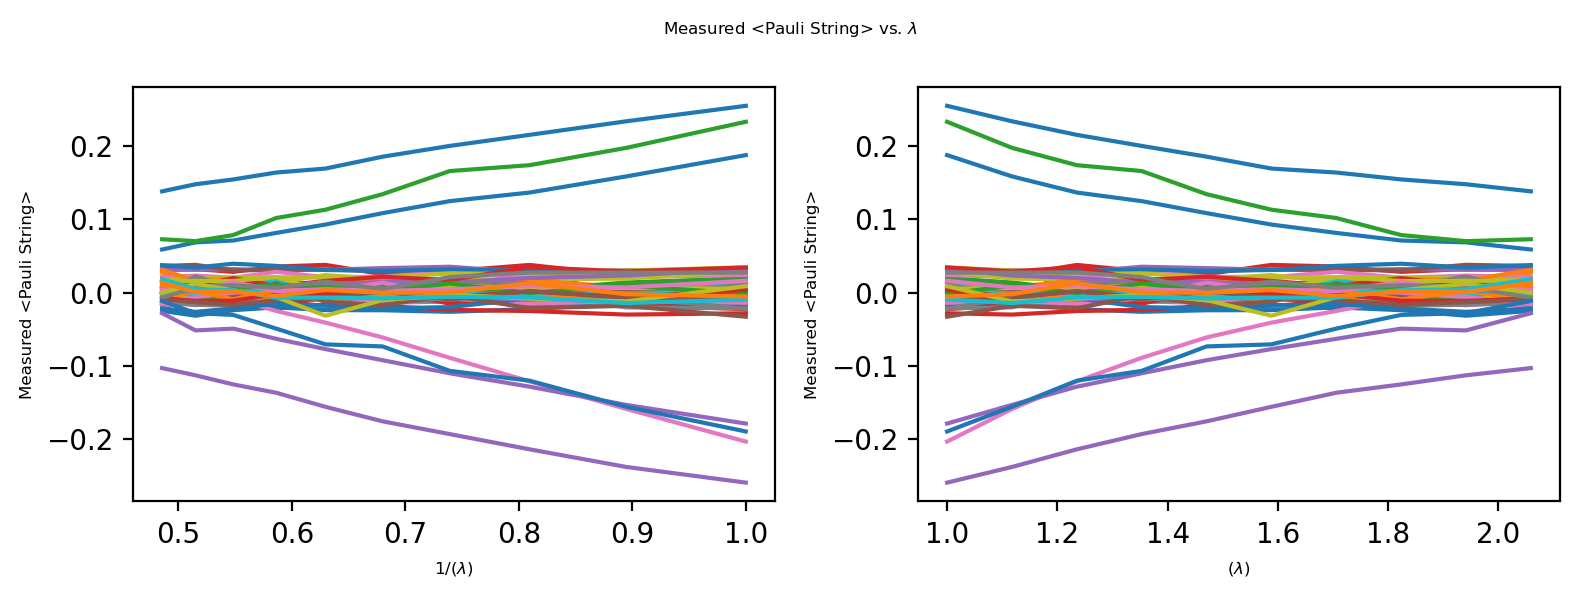

In [59]:
axs = plot_parity(res_analysis, sweep_param_parser=unitary_folding_parser_factory(n=17), x_label="$\lambda$")

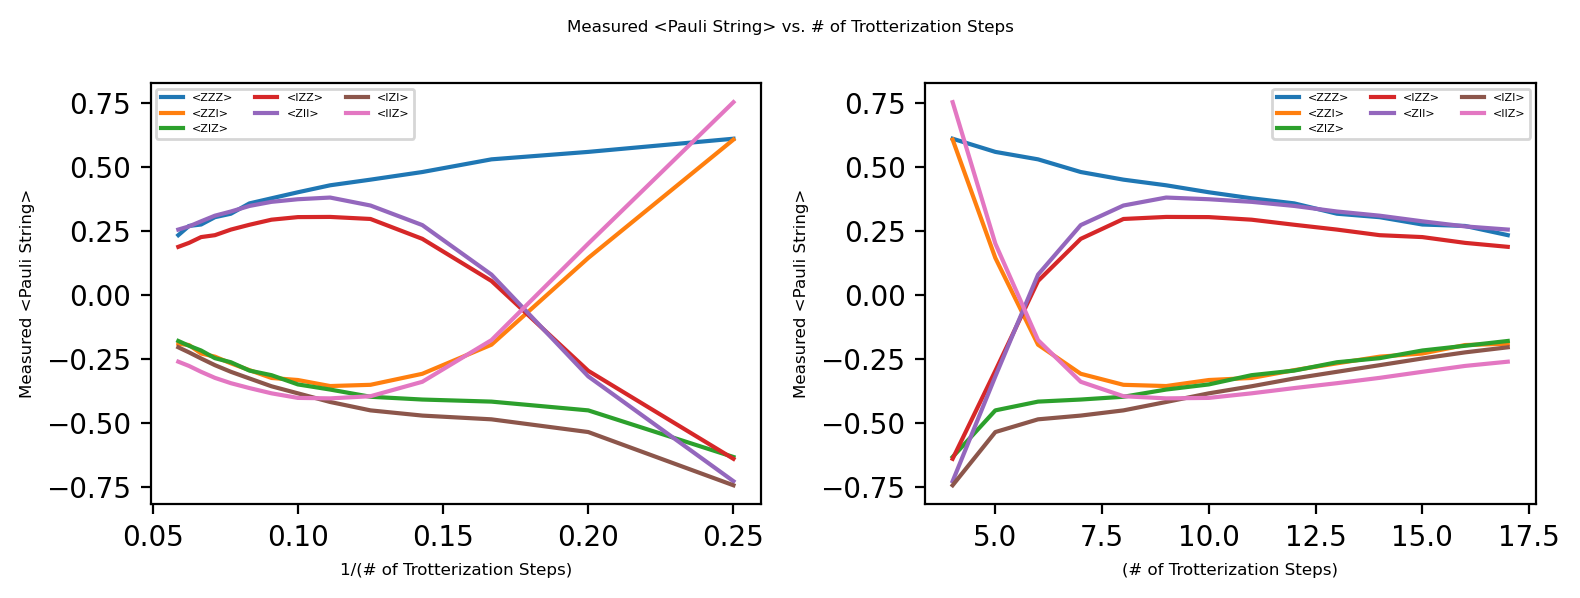

In [107]:
axs = plot_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

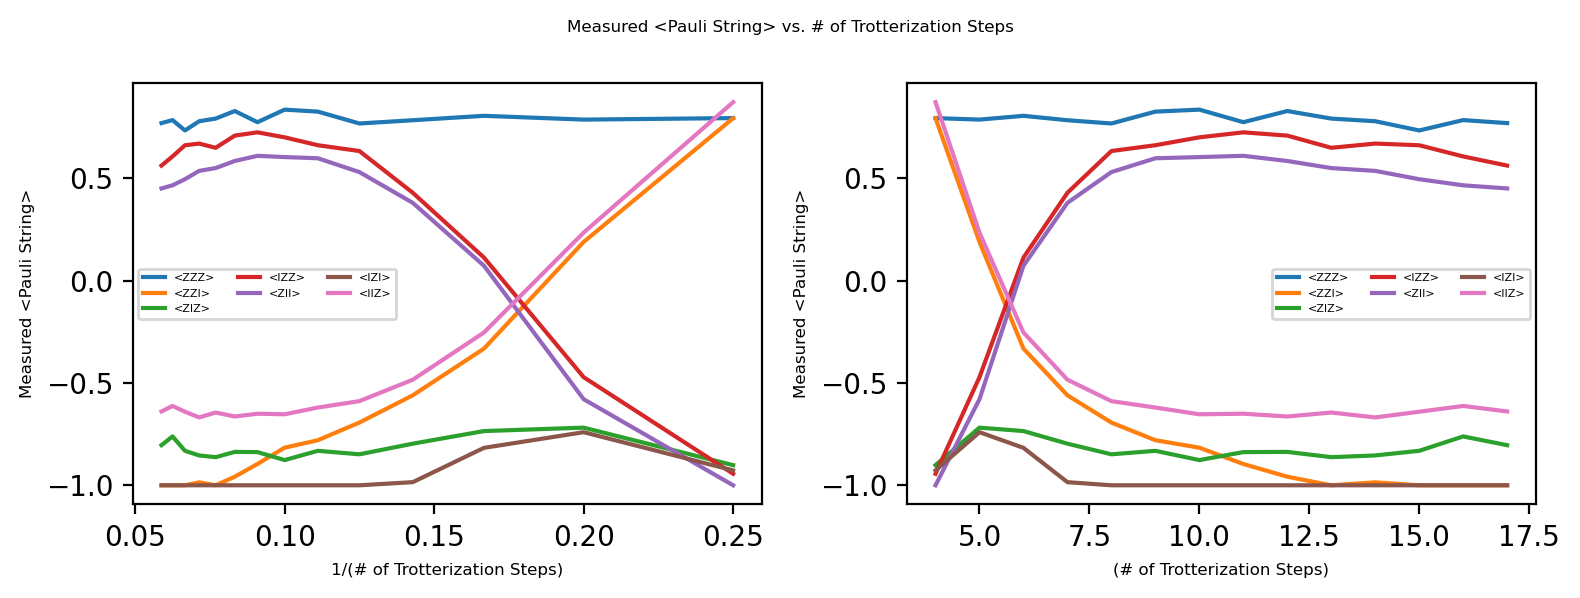

In [108]:
axs = plot_uf_parity(res_analysis, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

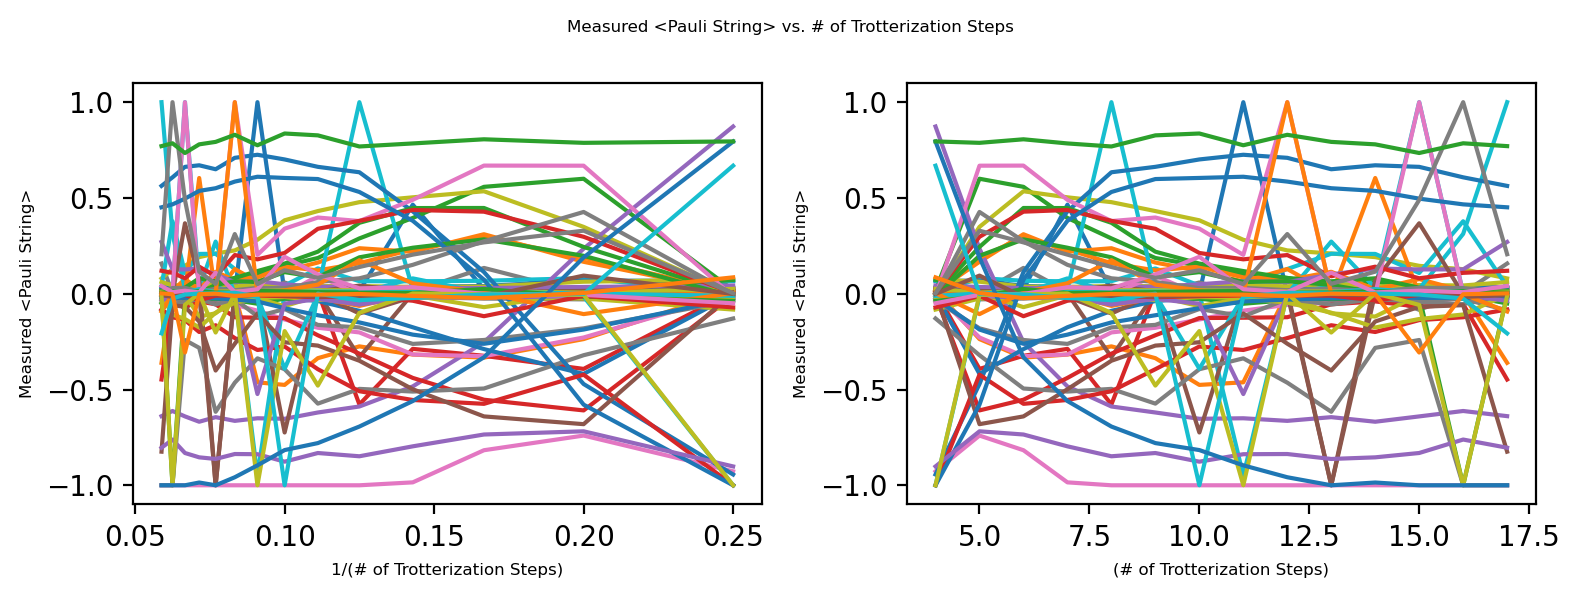

In [120]:
axs = plot_uf_parity(res_analysis)#, parity_strings=["ZZZ", "ZZI", "ZIZ", "IZZ", "ZII", "IZI", "IIZ"], legend=True)

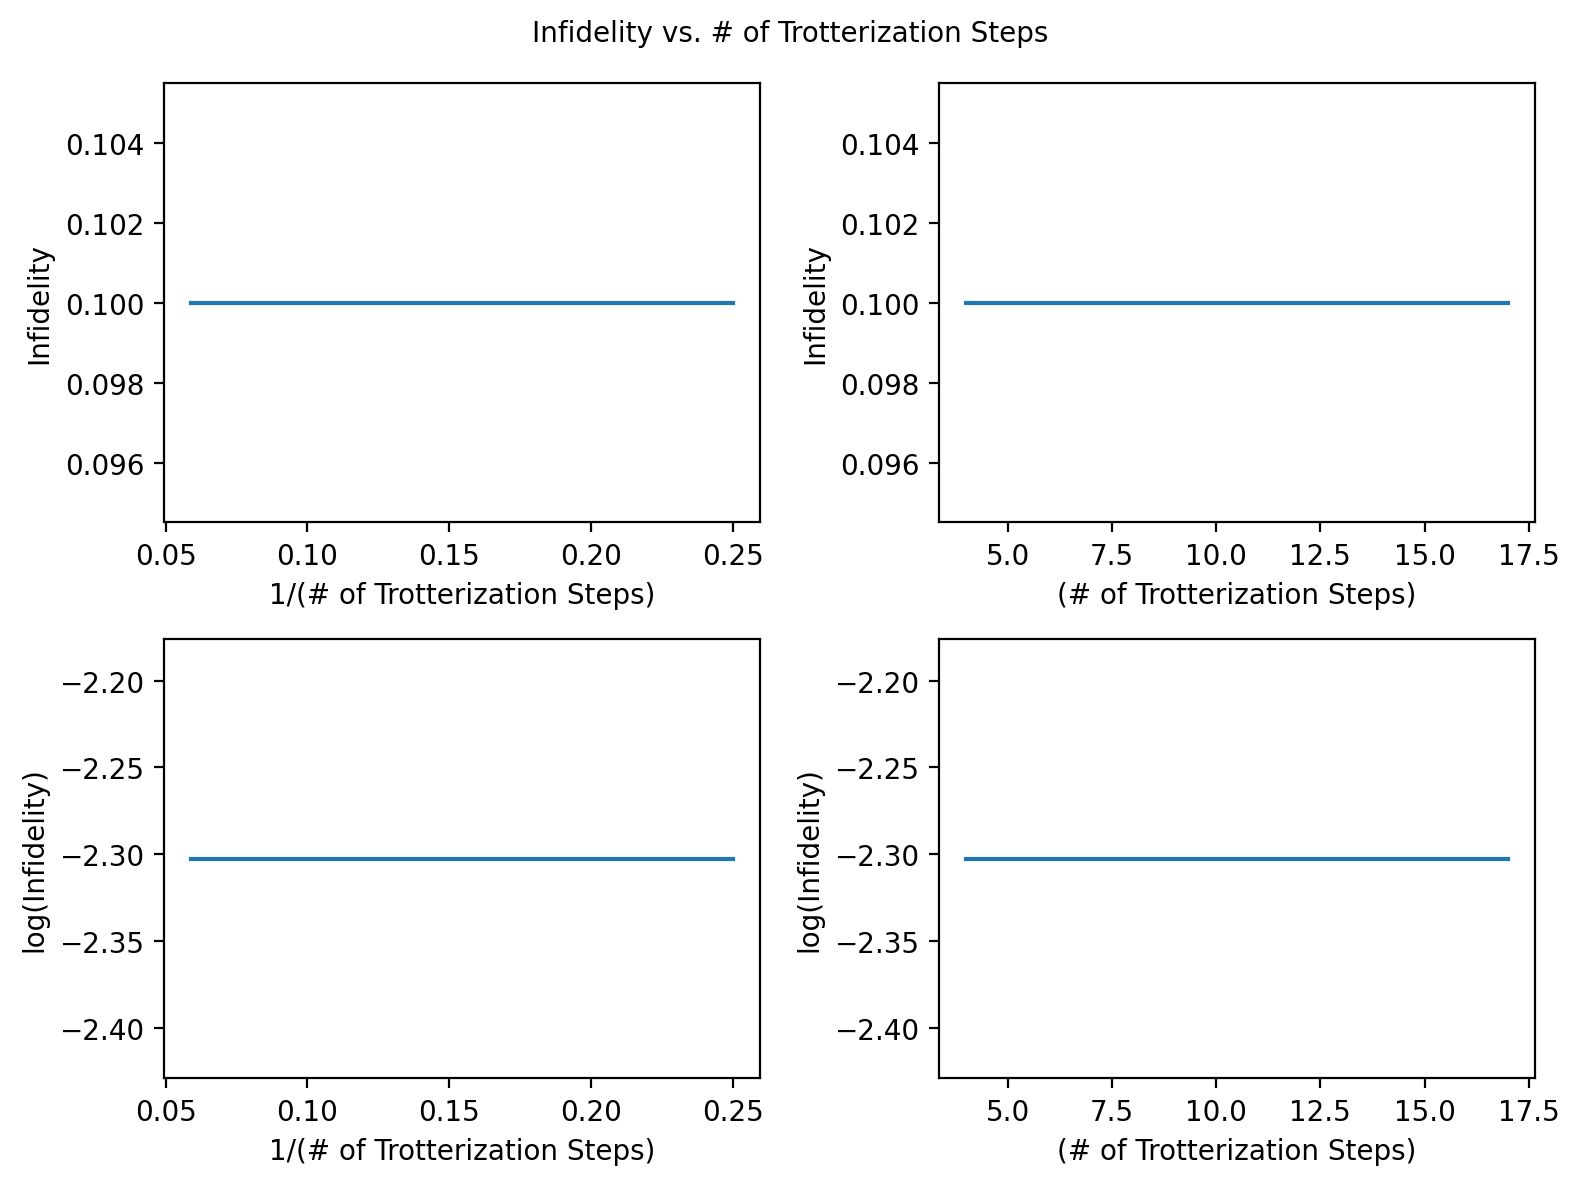

In [118]:
axs = plot_fidelities(res_analysis, key="uf_infid", data_key="analysis")

# Fitting UF Example

0.4511015838566229

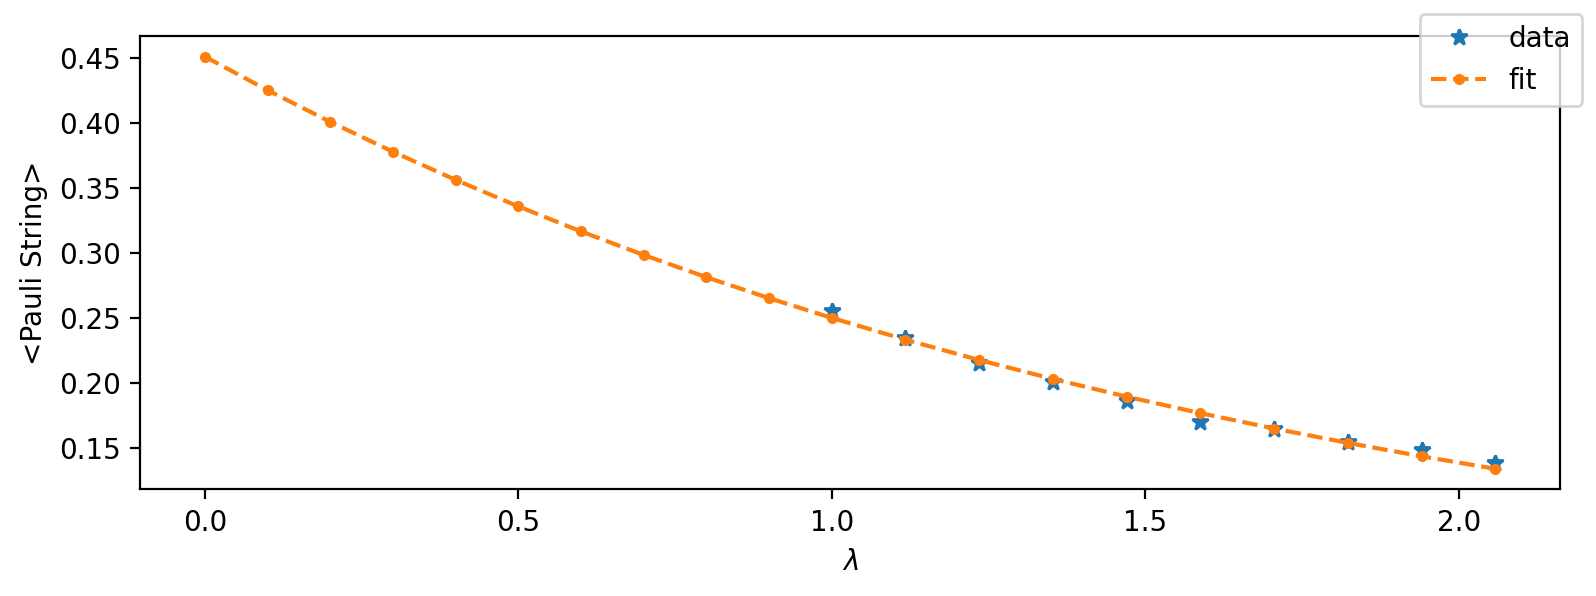

In [114]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["ZII"], sweep_param_parser = sweep_param_parser_UF)
fit_uf(steps, metric, plotting=True)

0.012144634852507738

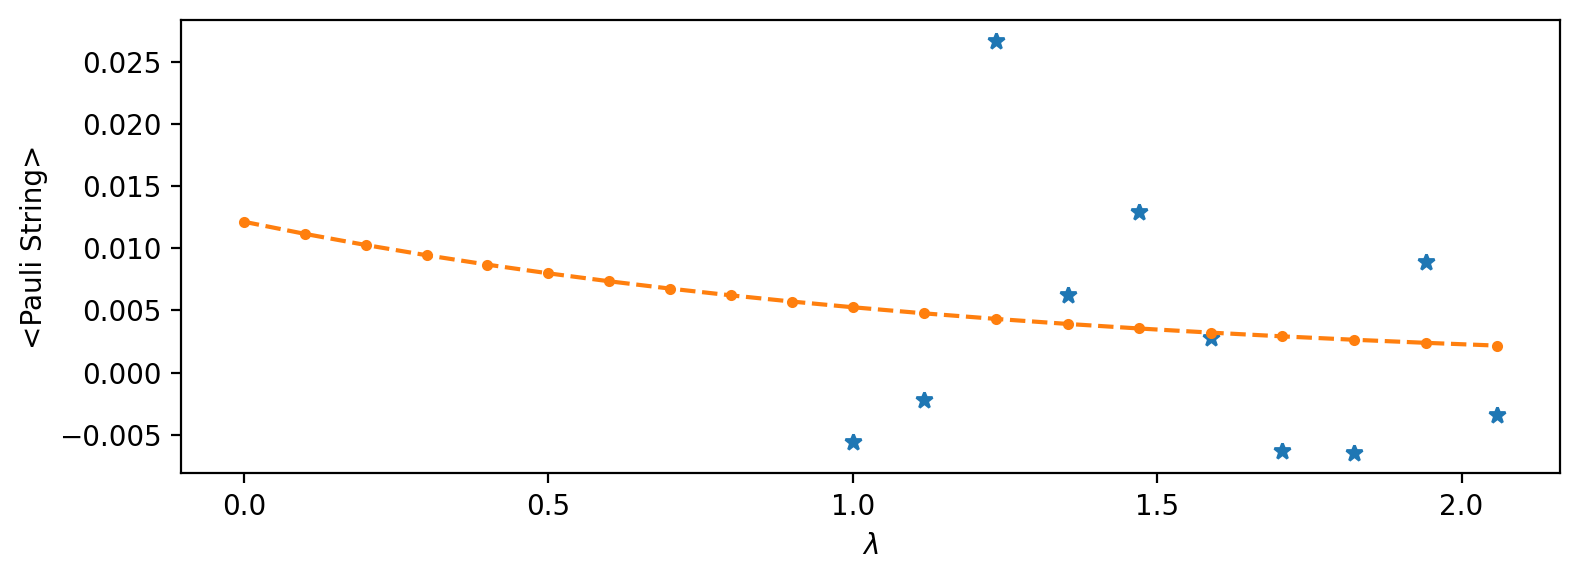

In [122]:
steps, metric = extract_metric(res_analysis, metric_func=lambda res: res["parity"]["XXX"], sweep_param_parser = sweep_param_parser_UF)
fit_uf(steps, metric, plotting=True)